In [6]:
import os 
import pandas as pd

from obspy.clients.fdsn.client import FDSNNoDataException ,Client
from obspy.core import UTCDateTime

In [7]:
main_path = os.path.abspath("")
file_path = os.path.join(main_path, 'earthquakes.txt')
df = pd.read_csv(file_path, sep='\s+')
df = df[df['ident.'] == 'MI']
df.head()

,Year,month,day,hour,minute,second,lat(WGS84),lng(WGS84),depth[km],mag.[ML],ML-std-dev,"mag.[MA],","MA-std-dev,",ident.
15,2007,1,1,17,0,35.48,-20.96675,-68.77356,6.46,1.437,0.016,1.628,0.016,MI
16,2007,1,1,17,21,31.12,-21.00206,-68.82029,4.77,1.704,0.031,1.939,0.031,MI
17,2007,1,1,17,32,13.06,-20.03404,-69.24281,8.44,1.833,0.020,2.076,0.017,MI
58,2007,1,3,15,44,31.23,-20.98417,-68.85387,3.76,1.371,0.015,1.512,0.013,MI
59,2007,1,3,17,19,0.52,-20.96850,-68.70245,1.01,1.641,0.027,1.811,0.028,MI


In [9]:
client = Client("GEOFON")
waveforms_list = []
dt = 60

for index, row in df.iloc[13000:13001,:].iterrows():
    time_stamp = UTCDateTime(row['Year'],row['month'],row['day'],row['hour'],row['minute'],row['second'])
    t1 =  time_stamp - dt
    t2 = time_stamp + dt
    try:
        waveform = client.get_waveforms("GE", "LVC", "10", "BH*", t1, t2)
        waveforms_list.append(waveform)
        print(f"time stamp {time_stamp}")
        print(f"start time {t1}, end time {t2}")
    except FDSNNoDataException:
        print(f"No 10 waveform for {t1}")

time stamp 2017-02-02T18:13:29.760000Z
start time 2017-02-02T18:12:29.760000Z, end time 2017-02-02T18:14:29.760000Z


In [12]:
waveforms_list

[3 Trace(s) in Stream:
GE.LVC.10.BH1 | 2017-02-02T18:12:29.769538Z - 2017-02-02T18:14:29.769538Z | 40.0 Hz, 4801 samples
GE.LVC.10.BH2 | 2017-02-02T18:12:29.769538Z - 2017-02-02T18:14:29.769538Z | 40.0 Hz, 4801 samples
GE.LVC.10.BHZ | 2017-02-02T18:12:29.769538Z - 2017-02-02T18:14:29.769538Z | 40.0 Hz, 4801 samples]

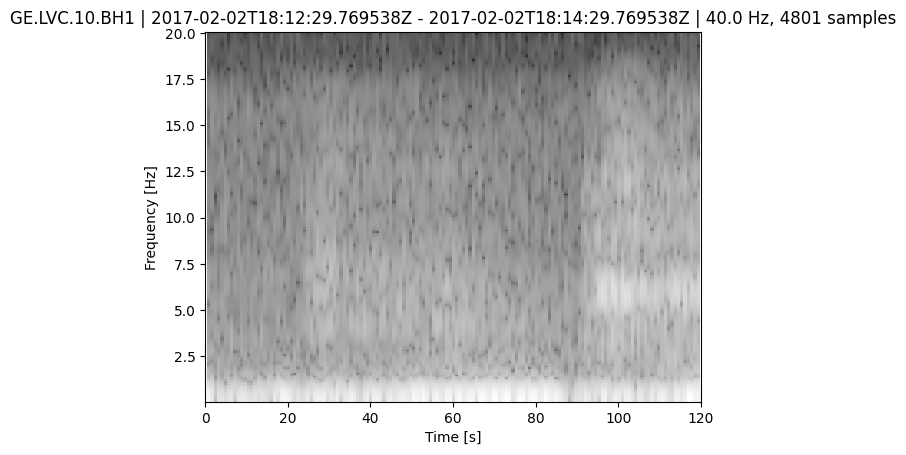

In [14]:
trace = waveforms_list[0][0]
trace.spectrogram(cmap = 'gray', wlen = 2, per_lap = 0.5, dbscale = True)